In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/python jupyter/Deep Learning/csv files/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.drop('Purchased',axis=1)
Y = df['Purchased']

In [7]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [11]:
X_train.shape

(320, 2)

In [12]:
X_scaled.shape

(400, 2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# BATCH GRADIENT DESCENT

In [14]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,Y_train,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3469 - loss: 4140.7900
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3469 - loss: 3466.1504
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3469 - loss: 2979.1570
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3469 - loss: 2572.4646
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3469 - loss: 2212.0547
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3469 - loss: 1882.1458
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3469 - loss: 1573.9413
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3469 - loss: 1281.9551
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3469 - loss: 1003.0574
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3469 - loss: 738.1810
2.1266000270843506


# STOCHASTIC GRADIENT DESCENT

In [17]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,Y_train,epochs=10,batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6978 - loss: 2072.0227
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3637 - loss: 0.7062
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5540 - loss: 0.6903
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6365 - loss: 0.6803
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6847 - loss: 0.6634
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6400 - loss: 0.6658
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6637 - loss: 0.6545
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6511 - loss: 0.6550
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6716 - loss: 0.6444
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6633 - loss: 0.6454
8.569857597351074


# for same epochs stoichastic GD accuracy will be more

In [20]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,Y,epochs=10,batch_size=400,validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2344 - loss: 0.7678 - val_accuracy: 0.3375 - val_loss: 0.7502
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.2844 - loss: 0.7544 - val_accuracy: 0.3625 - val_loss: 0.7471
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3562 - loss: 0.7449 - val_accuracy: 0.3625 - val_loss: 0.7445
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4281 - loss: 0.7376 - val_accuracy: 0.3625 - val_loss: 0.7423
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4875 - loss: 0.7317 - val_accuracy: 0.3625 - val_loss: 0.7402
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5156 - loss: 0.7265 - val_accuracy: 0.3625 - val_loss: 0.7382
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5594 - loss: 0.7217 - val_accuracy: 0.3625 - val_loss: 0.7364
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6094 - loss: 0.7173 - val_accuracy: 0.3625 - val_loss: 0.

In [23]:
# stoichastic GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,Y,epochs=10,batch_size=1,validation_split=0.2)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7681 - loss: 0.5882 - val_accuracy: 0.6500 - val_loss: 0.6616
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8331 - loss: 0.3786 - val_accuracy: 0.6875 - val_loss: 0.5765
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.3281 - val_accuracy: 0.7125 - val_loss: 0.5082
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3077 - val_accuracy: 0.7250 - val_loss: 0.4612
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.2871 - val_accuracy: 0.7500 - val_loss: 0.4145
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8873 - loss: 0.2420 - val_accuracy: 0.8750 - val_loss: 0.3667
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 0.3079 - val_accuracy: 0.9000 - val_loss: 0.3378
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8365 - loss: 0.3031 - val_accuracy: 0.

### The loss function is reduce unstably in stoichastic GD and very stably in batch GD

In [24]:
# stoichastic GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,Y,epochs=500,batch_size=1,validation_split=0.2)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9006 - loss: 0.2203 - val_accuracy: 0.9750 - val_loss: 0.2553
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.2688 - val_accuracy: 0.9750 - val_loss: 0.2418
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8665 - loss: 0.2786 - val_accuracy: 0.9750 - val_loss: 0.2321
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.2849 - val_accuracy: 0.9750 - val_loss: 0.2194
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.2618 - val_accuracy: 0.9750 - val_loss: 0.2141
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9018 - loss: 0.2338 - val_accuracy: 0.9875 - val_loss: 0.2125
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.2759 - val_accuracy: 0.9875 - val_loss: 0.2066
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.3120 - val_accu

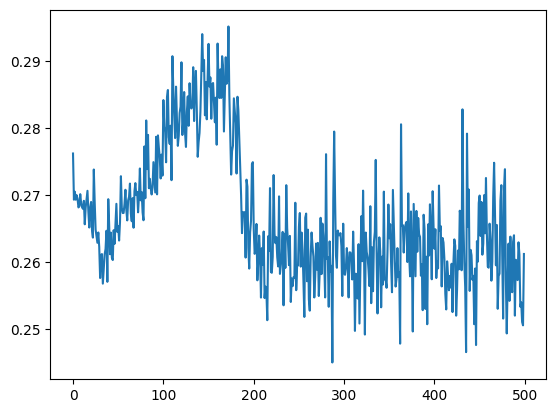

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [26]:
# batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,Y,epochs=500,batch_size=400,validation_split=0.2)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9219 - loss: 0.2399 - val_accuracy: 0.8375 - val_loss: 0.3278
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9219 - loss: 0.2322 - val_accuracy: 0.8375 - val_loss: 0.3380
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9187 - loss: 0.2280 - val_accuracy: 0.8375 - val_loss: 0.3446
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9156 - loss: 0.2251 - val_accuracy: 0.8125 - val_loss: 0.3491
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9156 - loss: 0.2229 - val_accuracy: 0.8125 - val_loss: 0.3522
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9156 - loss: 0.2212 - val_accuracy: 0.8125 - val_loss: 0.3558
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9156 - loss: 0.2198 - val_accuracy: 0.8125 - val_loss: 0.3601
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9156 - loss: 0.2186 - val_accuracy: 0.8125 - val_los

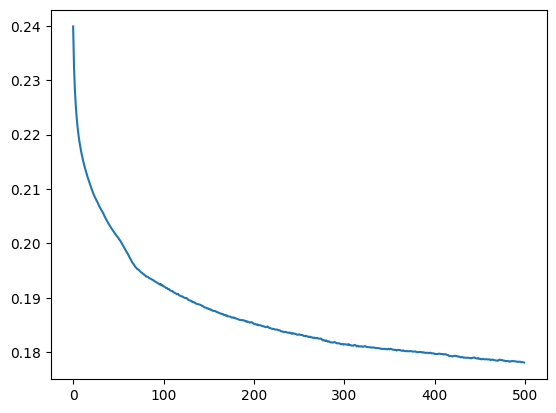

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# MINI BATCH GD

In [28]:
# mini-batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,Y,epochs=10,batch_size=150,validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9266 - loss: 0.1902 - val_accuracy: 0.8375 - val_loss: 0.3415
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9242 - loss: 0.1607 - val_accuracy: 0.8500 - val_loss: 0.3517
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9167 - loss: 0.1772 - val_accuracy: 0.8500 - val_loss: 0.3465
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9242 - loss: 0.1616 - val_accuracy: 0.8250 - val_loss: 0.3587
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9258 - loss: 0.1609 - val_accuracy: 0.8250 - val_loss: 0.3580
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9224 - loss: 0.1860 - val_accuracy: 0.8375 - val_loss: 0.3488
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9308 - loss: 0.1974 - val_accuracy: 0.8125 - val_loss: 0.3755
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9250 - loss: 0.1996 - val_accuracy: 0.8000 - val_loss: 0.3775

# VANISHING GRADIENT DESCENT

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [30]:
X,Y = make_moons(n_samples=250,noise=0.05,random_state=42)

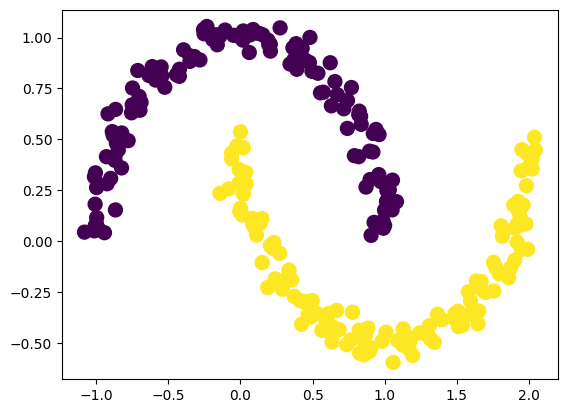

In [31]:
plt.scatter(X[:,0],X[:,1],c=Y,s=100)

In [32]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
old_weights = model.get_weights()[0]

In [35]:
old_weights

array([[-0.4043157 , -0.38072258,  0.08783269, -0.10506976,  0.06087404,
        -0.1297093 ,  0.5670739 , -0.48758677,  0.28773385,  0.55267566],
       [-0.14801264,  0.41351336, -0.13437104,  0.03857517,  0.43760484,
        -0.25715038, -0.13932467, -0.00913709, -0.63806856, -0.2740452 ]],
      dtype=float32)

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5224 - loss: 0.6934
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4942 - loss: 0.6935 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5164 - loss: 0.6930 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4839 - loss: 0.6933 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5364 - loss: 0.6923 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5014 - loss: 0.6935 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5298 - loss: 0.6916 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5344 - loss: 0.6922 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5095 - loss: 0.6929 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5062 - loss: 0.6935  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4759 - loss: 0.6945 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4577 - los

In [38]:
new_weights = model.get_weights()[0]

In [39]:
new_weights

array([[-0.4127597 , -0.38264582,  0.12716712, -0.1377645 ,  0.01579052,
        -0.11790978,  0.5453493 , -0.45790583,  0.29247674,  0.5137158 ],
       [-0.14067307,  0.41451398, -0.16529724,  0.06401949,  0.47208458,
        -0.2658003 , -0.12006288, -0.03459644, -0.6412838 , -0.23865551]],
      dtype=float32)

In [40]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [41]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [42]:
gradient

array([[  8.443981 ,   1.9232332, -39.33443  ,  32.69474  ,  45.083523 ,
        -11.799521 ,  21.72458  , -29.680937 ,  -4.7428904,  38.959858 ],
       [ -7.3395667,  -1.000613 ,  30.926197 , -25.444313 , -34.479736 ,
          8.649915 , -19.261784 ,  25.459341 ,   3.215253 , -35.38969  ]],
      dtype=float32)

In [43]:
percent_change

array([[2.08846235e+00, 5.05153477e-01, 4.47833595e+01, 3.11171780e+01,
        7.40603485e+01, 9.09689713e+00, 3.83099675e+00, 6.08731413e+00,
        1.64836025e+00, 7.04931736e+00],
       [4.95874357e+00, 2.41978392e-01, 2.30155239e+01, 6.59603424e+01,
        7.87919474e+00, 3.36375761e+00, 1.38251076e+01, 2.78637177e+02,
        5.03904045e-01, 1.29138155e+01]], dtype=float32)

# HOW TO SOLVE THE VANSHISHING GD
## REDUCE THE COMPLEXITY OF THE MODEL I.E REDUCE HIDDEN LAYERS

In [44]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [46]:
old_weights = model.get_weights()[0]

In [47]:
old_weights

array([[ 0.336093  ,  0.44479054, -0.4435197 ,  0.44310516,  0.50211054,
         0.20078218, -0.08151001,  0.33524293,  0.10599577, -0.60936993],
       [-0.17491597,  0.05996668, -0.241741  ,  0.41443557, -0.6424877 ,
         0.03509384,  0.0693469 ,  0.32973439, -0.419205  ,  0.22246385]],
      dtype=float32)

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5489 - loss: 0.9287
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5136 - loss: 0.9544 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4826 - loss: 0.9749 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 0.9269 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4840 - loss: 0.9229 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5474 - loss: 0.8134 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5414 - loss: 0.8192 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 0.8108 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.7671 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5587 - loss: 0.7482 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5297 - loss: 0.7520 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5310 - loss

In [50]:
new_weights = model.get_weights()[0]

In [51]:
new_weights

array([[ 0.53285444,  1.2843075 ,  0.3861741 , -0.6506785 ,  1.2176511 ,
         0.9634615 ,  0.5738007 ,  0.9741298 ,  0.90381545, -0.4837562 ],
       [-0.7685799 , -1.1043334 , -1.2608    ,  1.666367  , -1.687073  ,
        -0.9698059 , -0.85591745, -0.6114696 , -1.4872057 ,  0.12303249]],
      dtype=float32)

In [52]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [53]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [54]:
gradient

array([[ -196.76141 ,  -839.5169  ,  -829.6937  ,  1093.7836  ,
         -715.5405  ,  -762.6793  ,  -655.31067 ,  -638.88684 ,
         -797.81964 ,  -125.613716],
       [  593.6639  ,  1164.3     ,  1019.0589  , -1251.9314  ,
         1044.5852  ,  1004.8997  ,   925.26434 ,   941.204   ,
         1068.0007  ,    99.43135 ]], dtype=float32)

In [55]:
percent_change

array([[  58.543747,  188.74432 ,  187.07033 ,  246.84515 ,  142.50659 ,
         379.85413 ,  803.96344 ,  190.57431 ,  752.69006 ,   20.613705],
       [ 339.3995  , 1941.5782  ,  421.5499  ,  302.0811  ,  162.58447 ,
        2863.4644  , 1334.2548  ,  285.44308 ,  254.76814 ,   44.695515]],
      dtype=float32)

## use Relu activation function 

In [56]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [58]:
old_weights = model.get_weights()[0]

In [59]:
old_weights

array([[ 0.53581816, -0.5569517 , -0.6822546 ,  0.69605654,  0.2590379 ,
         0.6569763 , -0.15767169,  0.28154635, -0.4528114 ,  0.07183897],
       [ 0.4697098 , -0.11022156, -0.14998966,  0.3314199 ,  0.23598307,
         0.25202078, -0.3967062 ,  0.37311715, -0.03134733,  0.20827657]],
      dtype=float32)

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [61]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5089 - loss: 0.6932
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5382 - loss: 0.6924 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5949 - loss: 0.6917 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6294 - loss: 0.6914 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5963 - loss: 0.6909 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6754 - loss: 0.6893 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5866 - loss: 0.6886 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6304 - loss: 0.6860 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 0.6829 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6733 - loss: 0.6785 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6175 - loss: 0.6749 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss

In [62]:
new_weights = model.get_weights()[0]

In [63]:
new_weights

array([[ 0.5145395 , -0.6783413 , -0.7508837 ,  0.72596914,  0.16604505,
         0.77078277, -0.15760273,  0.3448387 , -0.48778066,  0.08648463],
       [ 0.63272583,  0.03215755,  0.09135607,  0.16676903,  0.4807952 ,
         0.023051  , -0.5192802 ,  0.3789492 , -0.00643321,  0.3275487 ]],
      dtype=float32)

In [64]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [65]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [66]:
gradient

array([[ 2.1278679e+01,  1.2138962e+02,  6.8629082e+01, -2.9912590e+01,
         9.2992851e+01, -1.1380648e+02, -6.8962574e-02, -6.3292351e+01,
         3.4969269e+01, -1.4645658e+01],
       [-1.6301601e+02, -1.4237910e+02, -2.4134572e+02,  1.6465085e+02,
        -2.4481212e+02,  2.2896977e+02,  1.2257400e+02, -5.8320460e+00,
        -2.4914127e+01, -1.1927214e+02]], dtype=float32)

In [67]:
percent_change

array([[3.97125006e+00, 2.17953606e+01, 1.00591602e+01, 4.29743671e+00,
        3.58993225e+01, 1.73227692e+01, 4.37380821e-02, 2.24802608e+01,
        7.72270107e+00, 2.03867874e+01],
       [3.47056847e+01, 1.29175354e+02, 1.60908234e+02, 4.96804390e+01,
        1.03741394e+02, 9.08535385e+01, 3.08979301e+01, 1.56306040e+00,
        7.94776611e+01, 5.72662315e+01]], dtype=float32)